# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [128]:
import yfinance as yf

def get_historical_data(symbol, start_date, end_date):
    ''' Daily quotes from Yahoo Finance. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    # Download historical data using Yahoo Finance
    data = yf.download(symbol, start=start_date, end=end_date)

    # Rename columns to match your previous naming convention
    data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    data['Date'] = data.index
    data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

    return data

# Example usage:
data = get_historical_data('GOOGL', '2021-11-01', '2024-06-30')
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                                          Date        Open        High  \
Ticker                                                    GOOGL       GOOGL   
Date                                                                          
2021-11-01 00:00:00+00:00 2021-11-01 00:00:00+00:00  148.046005  148.046005   
2021-11-02 00:00:00+00:00 2021-11-02 00:00:00+00:00  144.579498  146.608994   
2021-11-03 00:00:00+00:00 2021-11-03 00:00:00+00:00  145.900497  146.669006   
2021-11-04 00:00:00+00:00 2021-11-04 00:00:00+00:00  147.124496  149.733505   
2021-11-05 00:00:00+00:00 2021-11-05 00:00:00+00:00  149.169495  150.327499   

Price                             Low       Close    Volume  
Ticker                          GOOGL       GOOGL     GOOGL  
Date                                                         
2021-11-01 00:00:00+00:00  143.225494  143.496994  46924000  
2021-11-02 00:00:00+00:00  144.335495  145.432495  33482000  
2021-11-03 00:00:00+00:00  144.591003  146.598007  274940

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [129]:
data = get_historical_data('GOOGL','2021-11-01','2024-06-30') # from January 1, 2005 to June 30, 2017

[*********************100%***********************]  1 of 1 completed


**Step 3:** Write the data to a csv file.

In [130]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [131]:
import pandas as pd
import numpy as np

# Step 1: Load the data from CSV, and check the column names first
data = pd.read_csv('google.csv', skiprows=1)

# Print the column names to inspect
print("Columns in the dataset:", data.columns)

# Step 2: If the column names aren't correct, manually rename them
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Step 3: Convert columns to numeric, forcing errors to NaN
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Step 4: Print the first few rows to ensure data looks correct
print(data.head())

# Step 5: Now calculate and print the statistics for each column
print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))



Columns in the dataset: Index(['Unnamed: 0', 'GOOGL', 'GOOGL.1', 'GOOGL.2', 'GOOGL.3', 'GOOGL.4'], dtype='object')
                        Date        Open        High         Low       Close  \
0  2021-11-01 00:00:00+00:00  148.046005  148.046005  143.225494  143.496994   
1  2021-11-02 00:00:00+00:00  144.579498  146.608994  144.335495  145.432495   
2  2021-11-03 00:00:00+00:00  145.900497  146.669006  144.591003  146.598007   
3  2021-11-04 00:00:00+00:00  147.124496  149.733505  146.307999  148.267502   
4  2021-11-05 00:00:00+00:00  149.169495  150.327499  148.197006  148.852005   

     Volume  
0  46924000  
1  33482000  
2  27494000  
3  38412000  
4  38354000  


Open   --- mean : 125.84624185390815   	 Std:  22.277288585632263   	 Max:  184.32000732421875   	 Min:  85.4000015258789
High   --- mean : 127.38198585281829   	 Std:  22.276142038823778   	 Max:  186.0500030517578   	 Min:  86.5199966430664
Low    --- mean : 124.44441764511748   	 Std:  22.204157279903725   	 Max: 

**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [132]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item        Open       Close    Volume
0     0  184.320007  182.149994  29156600
1     1  184.179993  185.410004  18848900
2     2  182.630005  183.880005  19839000
3     3  179.619995  184.029999  23235600
4     4  180.160004  179.220001  18298000
---
     Item        Open       Close    Volume
663   663  149.169495  148.852005  38354000
664   664  147.124496  148.267502  38412000
665   665  145.900497  146.598007  27494000
666   666  144.579498  145.432495  33482000
667   667  148.046005  143.496994  46924000


**Step 2: ** Visualise raw data.

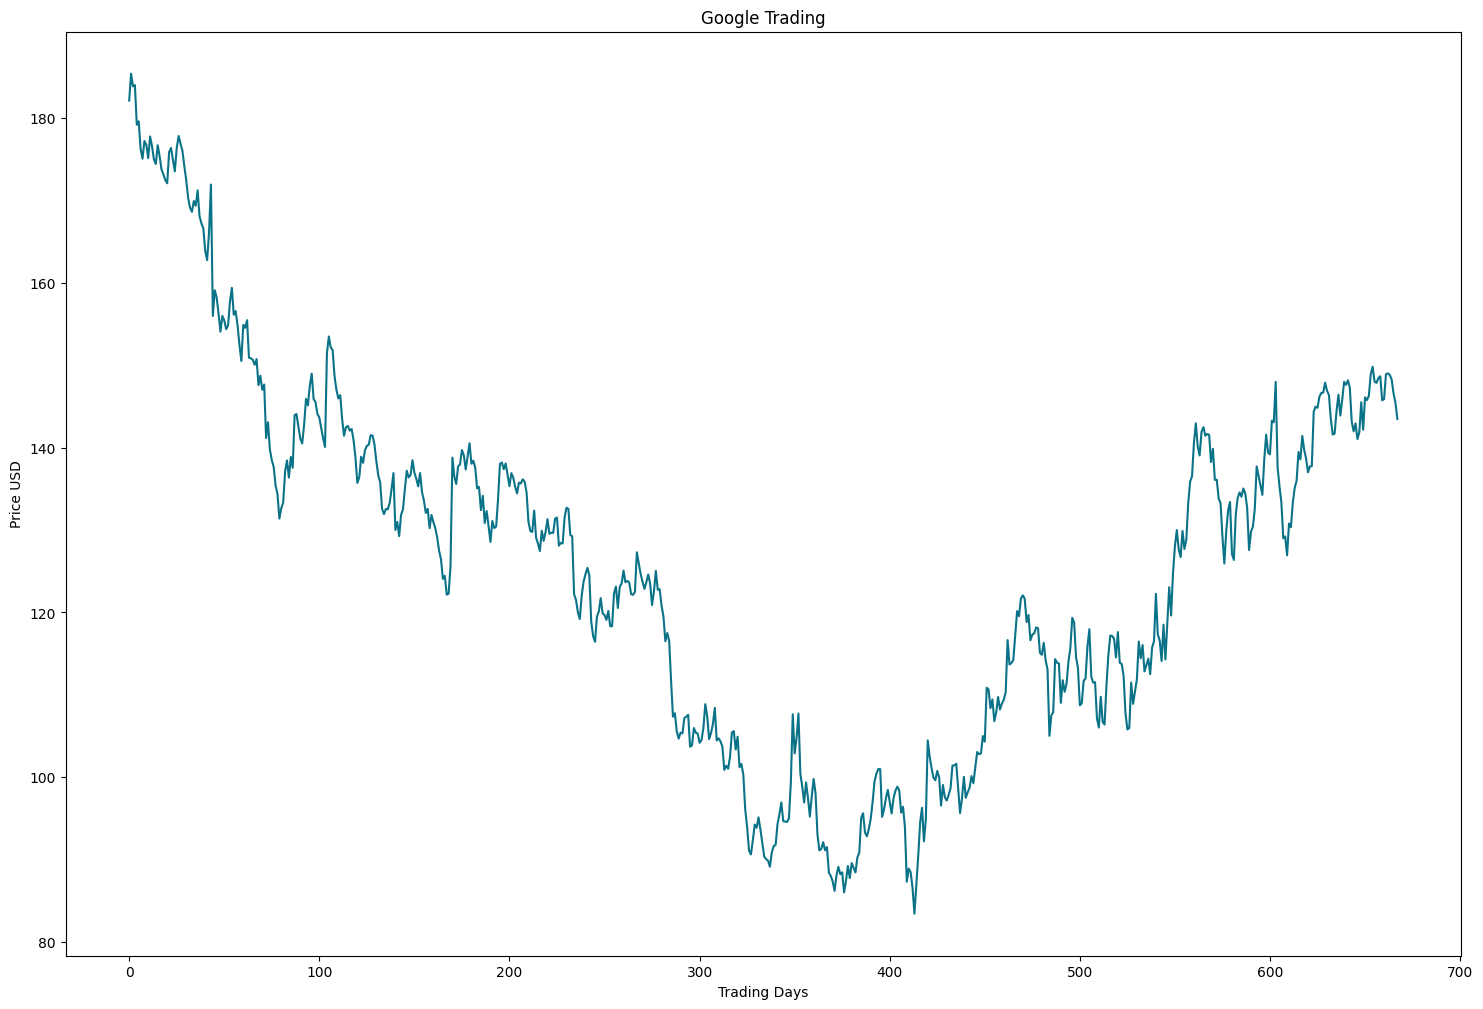

In [133]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [134]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  1.000000  0.968033  0.171414
1     1  0.998585  1.000000  0.080596
2     2  0.982915  0.984997  0.089319
3     3  0.952487  0.986468  0.119246
4     4  0.957946  0.939302  0.075742


Open   --- mean : 0.4088782648323303   	 Std:  0.22520508774582143   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.4168028119931067   	 Std:  0.2184012953498302   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.20074813421160032   	 Std:  0.11379920319962106   	 Max:  0.9999999999999999   	 Min:  0.0


**Step 4 :** Visualize the data again

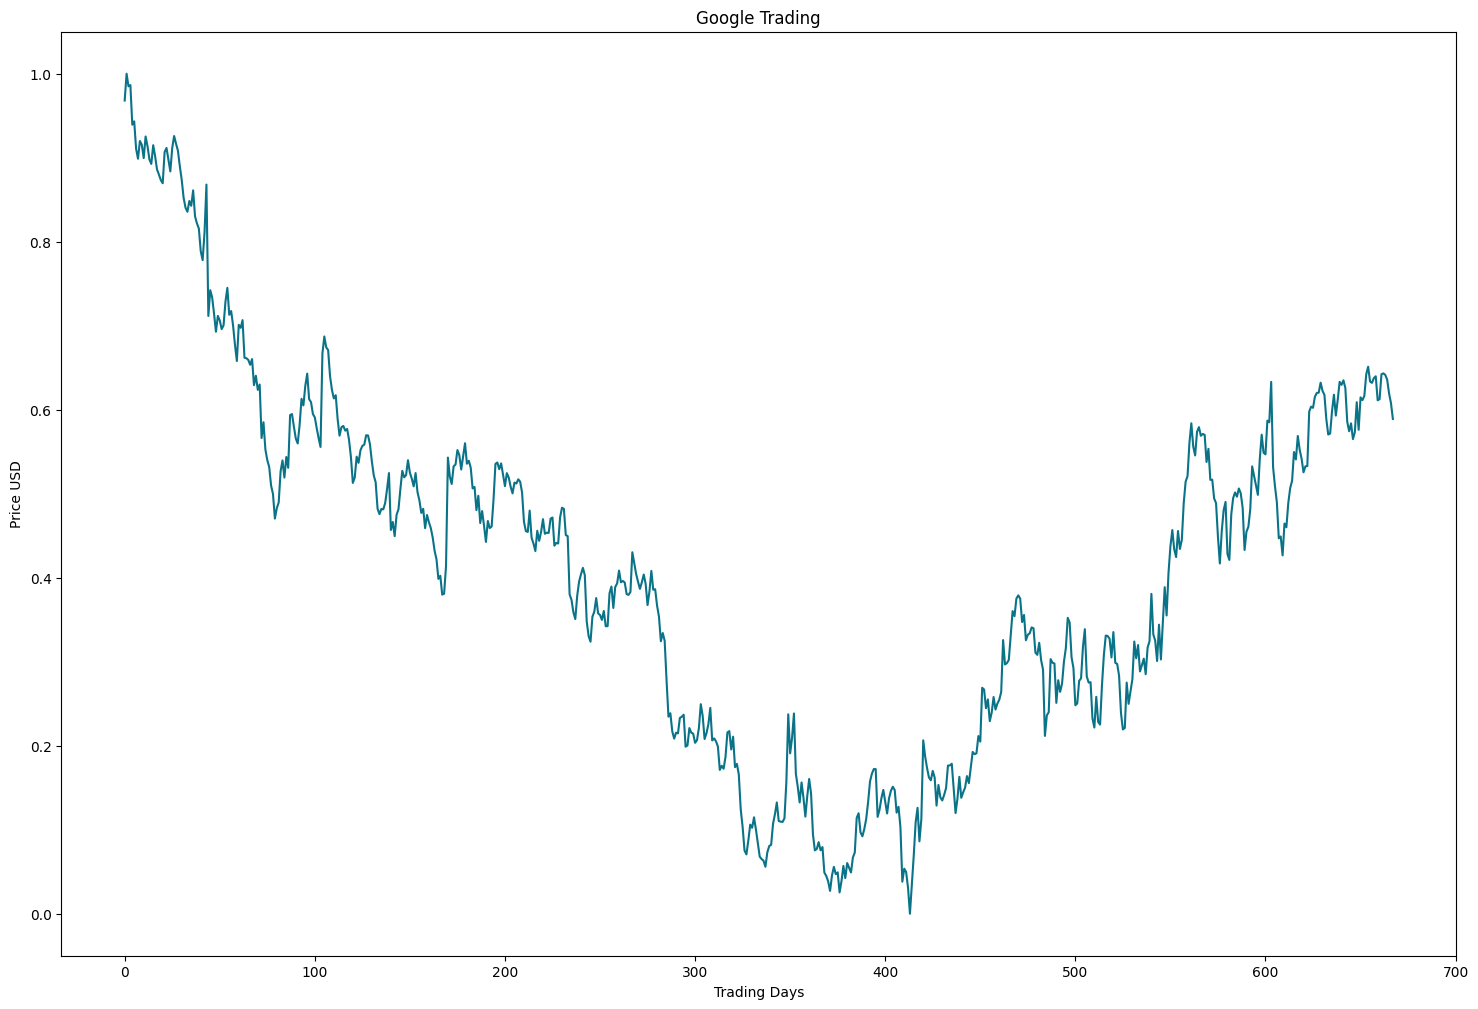

In [135]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [136]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model.

**Step 1:** Load the preprocessed data

In [137]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,1.000000,0.968033,0.171414
1,1,0.998585,1.000000,0.080596
2,2,0.982915,0.984997,0.089319
3,3,0.952487,0.986468,0.119246
4,4,0.957946,0.939302,0.075742


**Step 2:** Split data into train and test pair

In [138]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (458, 1)
y_train (458, 1)
x_test (210, 1)
y_test (210, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [139]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [140]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

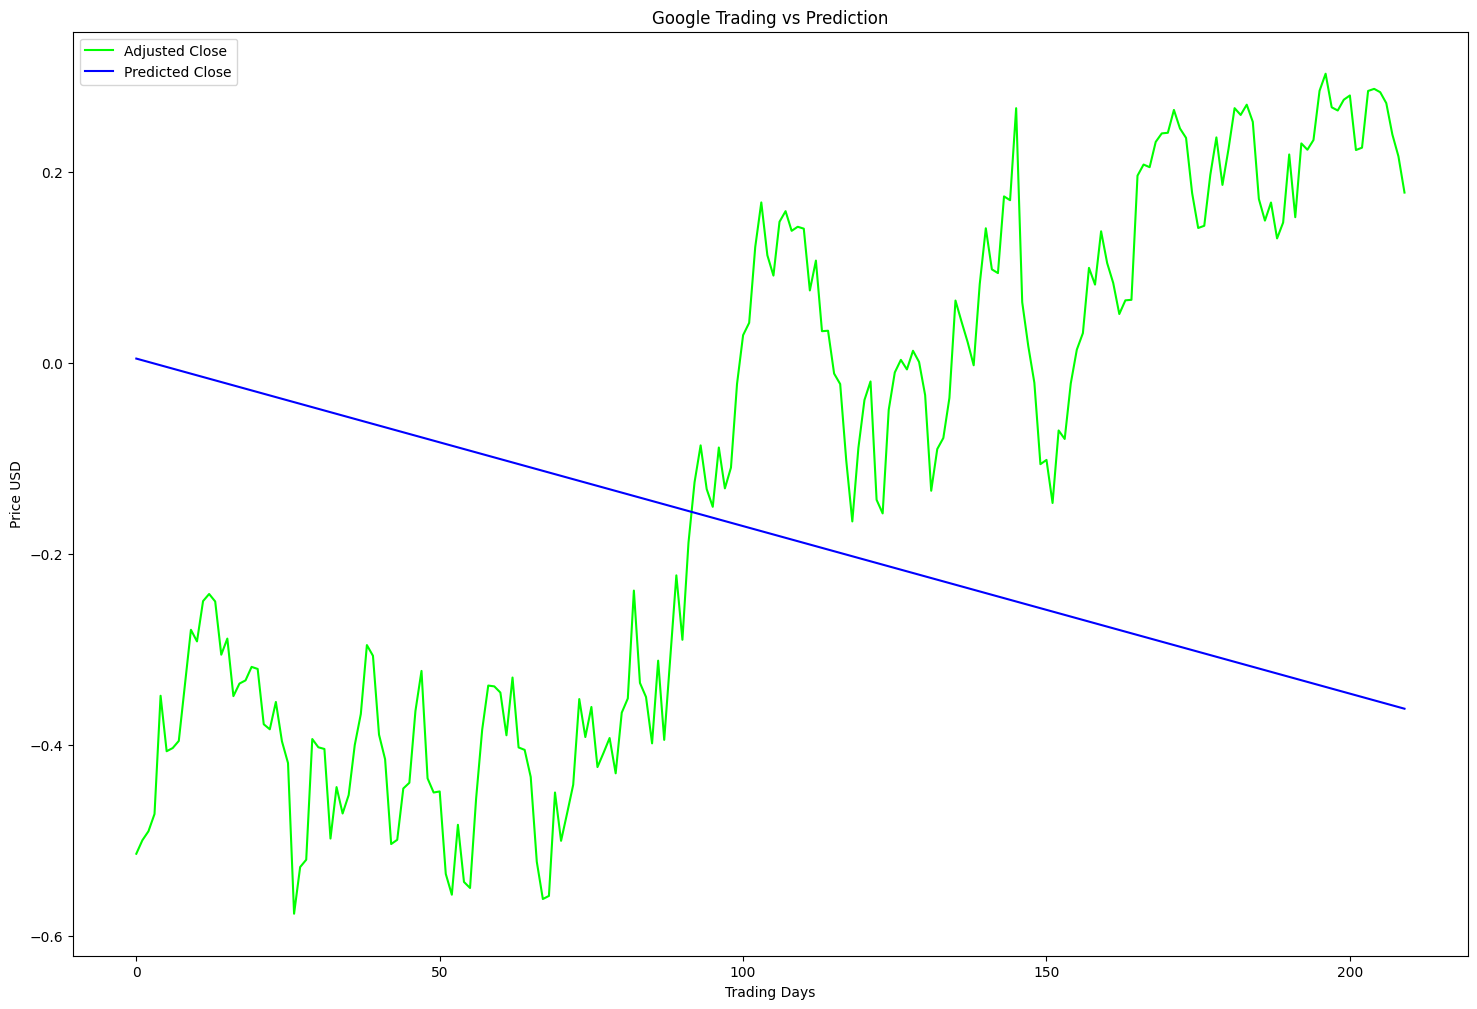

In [141]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [142]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7847 MSE (0.8859 RMSE)
Test Score: 0.13825034 MSE (0.37182030 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm

In [143]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

# Import from tensorflow.keras instead of keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
# Import mean_squared_error from tensorflow.keras.losses instead of tensorflow.keras.metrics
!pip install pyod
import tensorflow as tf
from pyod.models.auto_encoder import AutoEncoder
from tensorflow.keras.losses import MeanSquaredError
# Make sure to install tensorflow if not already installed
!pip install tensorflow

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,1.000000,0.968033,0.171414
1,0.998585,1.000000,0.080596
2,0.982915,0.984997,0.089319
3,0.952487,0.986468,0.119246
4,0.957946,0.939302,0.075742


In [144]:
# Load data and check column names
stocks = pd.read_csv('google_preprocessed.csv')
print("Columns in dataset:", stocks.columns)
print(stocks.head())


Columns in dataset: Index(['Item', 'Open', 'Close', 'Volume'], dtype='object')
   Item      Open     Close    Volume
0     0  1.000000  0.968033  0.171414
1     1  0.998585  1.000000  0.080596
2     2  0.982915  0.984997  0.089319
3     3  0.952487  0.986468  0.119246
4     4  0.957946  0.939302  0.075742


In [145]:
print(stocks.isnull().sum())  # Display count of missing values for each column


Item      0
Open      0
Close     0
Volume    0
dtype: int64


In [146]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    """
    Splits the dataset into training and testing features for Long Short Term Memory Model.
    """
    # Calculate total data length
    data_len = len(stocks)

    # Calculate starting indices for test data
    test_start_x = data_len - test_data_size - unroll_length - prediction_time
    test_start_y = test_start_x + prediction_time

    # Extract training data
    x_train = stocks.iloc[0:test_start_x].to_numpy()  # Ensure data is in array format
    y_train = stocks['Close'].iloc[prediction_time:test_start_x + prediction_time].to_numpy()

    # Extract testing data
    x_test = stocks.iloc[test_start_x:data_len - prediction_time].to_numpy()
    y_test = stocks['Close'].iloc[test_start_y:data_len].to_numpy()

    return x_train, x_test, y_train, y_test


In [147]:
X_train, X_test, y_train, y_test = train_test_split_lstm(stocks, prediction_time=5)
print("Train/Test shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Train/Test shapes: (163, 4) (163,) (500, 4) (500,)


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [148]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (113, 50, 3)
y_train (113,)
x_test (450, 50, 3)
y_test (450,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [149]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compilation time :  0.01843118667602539


**Step 4:** Train the model

In [150]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - loss: 0.2646 - val_loss: 7.2594e-04


**Step 5:** make prediction using test data

In [151]:
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


**Step 6:** Plot the results

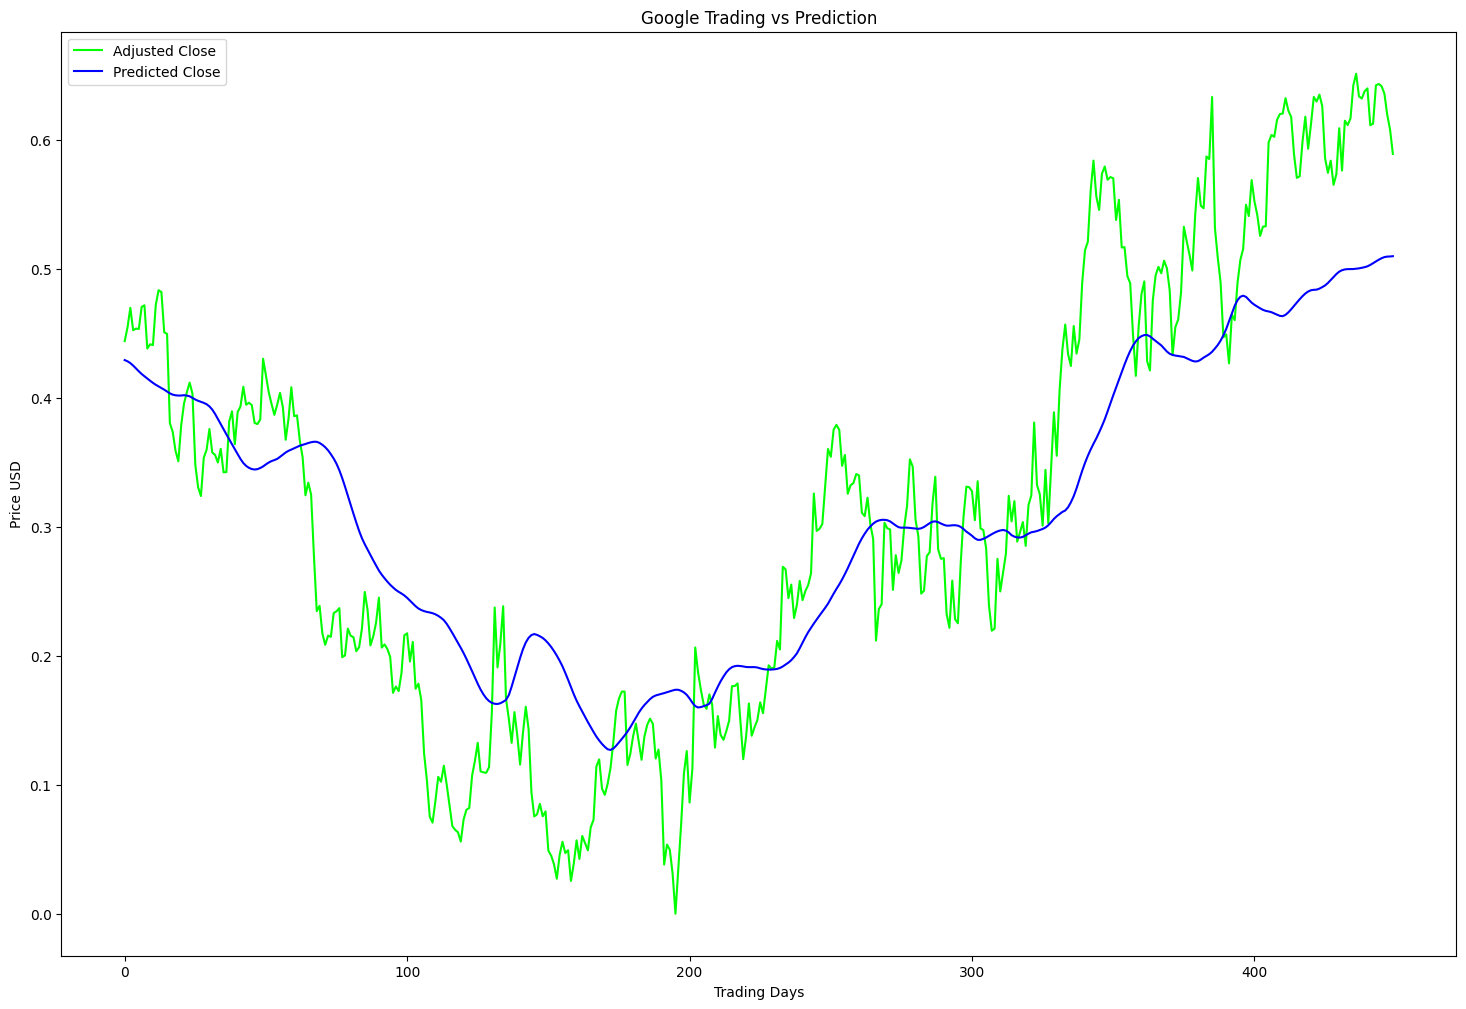

In [152]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [153]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00617375 MSE (0.07857324 RMSE)
Test Score: 0.00718905 MSE (0.08478824 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [154]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.014119386672973633


**Step 2: ** Train improved LSTM model

In [155]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
2/2 - 7s - 4s/step - loss: 0.2223 - val_loss: 0.0053
Epoch 2/5
2/2 - 0s - 118ms/step - loss: 0.0300 - val_loss: 0.0573
Epoch 3/5
2/2 - 0s - 120ms/step - loss: 0.0488 - val_loss: 0.0323
Epoch 4/5
2/2 - 0s - 152ms/step - loss: 0.0186 - val_loss: 0.0040
Epoch 5/5
2/2 - 0s - 153ms/step - loss: 0.0053 - val_loss: 3.5910e-04


**Step 3:** Make prediction on improved LSTM model

In [156]:
# Generate predictions
predictions = model.predict(X_test, batch_size=batch_size)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step


**Step 4:** plot the results

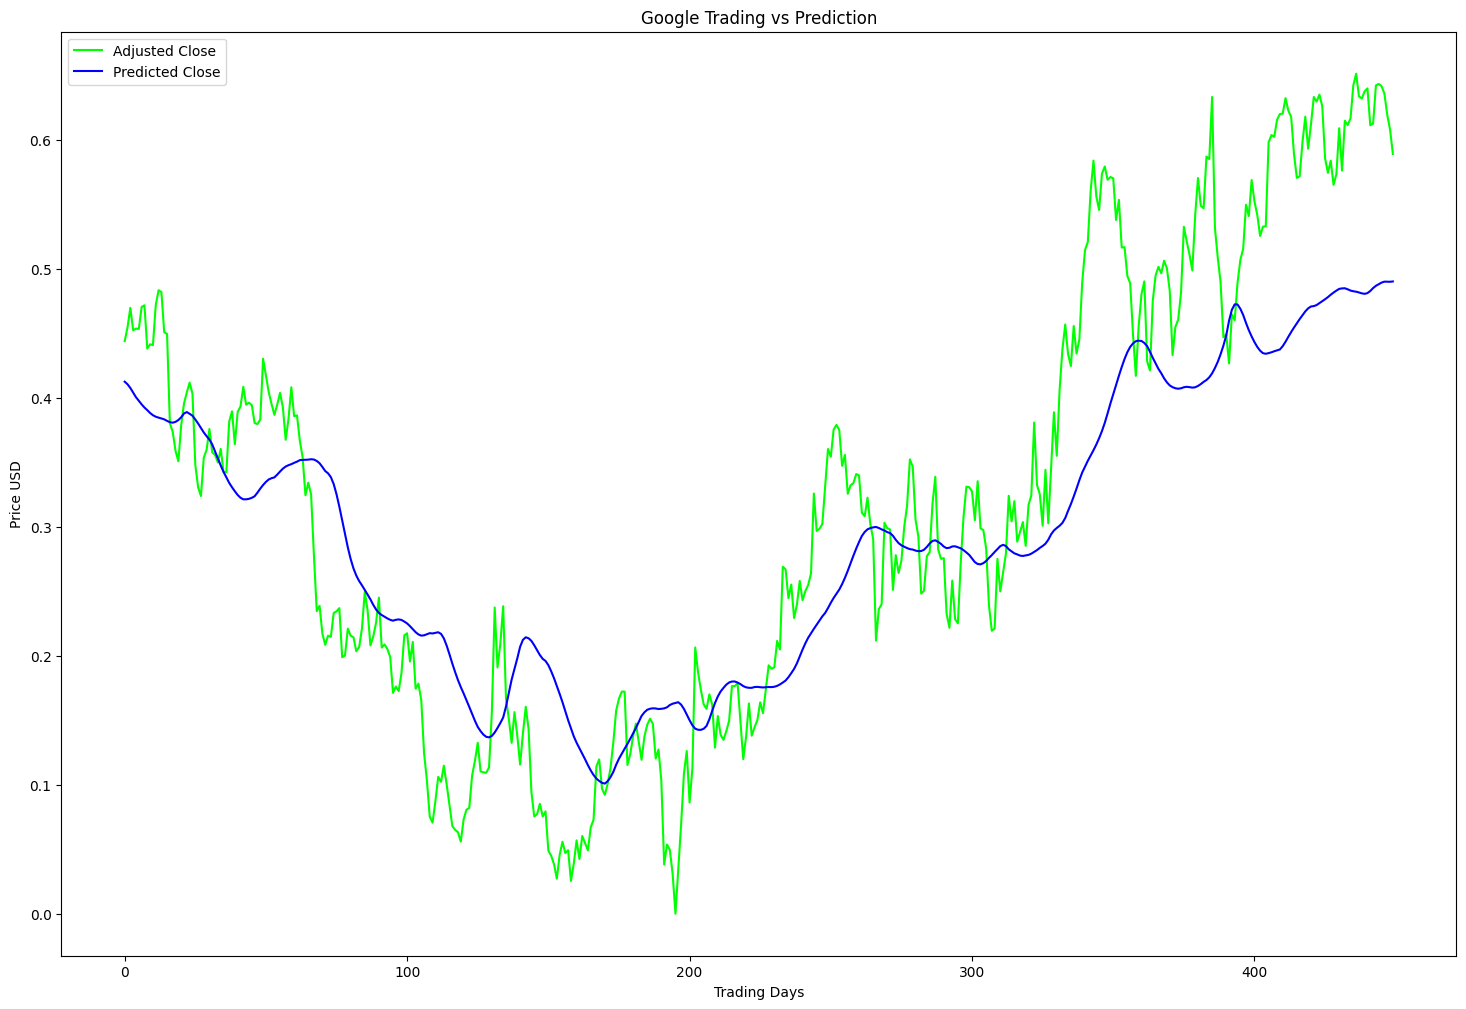

In [157]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [158]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01003171 MSE (0.10015844 RMSE)
Test Score: 0.00730909 MSE (0.08549321 RMSE)


In [159]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)

Delta Price: 0.007309 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [160]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].to_numpy()
Y = stocks[:]['Close'].to_numpy()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Test Score: 0.4113 MSE (0.6414 RMSE)
